In [2]:
%matplotlib inline
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from skimage import data
from skimage.feature import blob_dog,blob_log,blob_doh
from math import sqrt
from skimage.color import rgb2gray
from scipy.linalg import *

In [3]:
# Firrst we have to read the jpg
filename = "/home/rahul/Desktop/teddy.jpg"

im  = Image.open(filename)
pix = im.load()

pic_width = im.width
pic_height = im.height

im_ix = im.copy()

im_iy = im.copy()


im_ix_iy = im.copy()

def pixSubtract(pix1,pix2):
    r = pix1[0] - pix2[0]
    g = pix1[1] - pix2[1]
    b = pix1[2] - pix2[2]
    return (r,g,b)
def pixMul(pix1,pix2):
    r = pix1[0]* pix2[0]
    g = pix1[1] * pix2[1]
    b = pix1[2] * pix2[2]
    return (r,g,b)

            

In [5]:
# Now find Ix, Iy


for row in range(pic_height):
    for col in range(pic_width):
        if(row == pic_height-1 or row == 0 or col == pic_width-1 or col == 0):
            im_ix.putpixel((row,col), (0,0,0))
            im_iy.putpixel((row,col), (0,0,0))
            
        else:            
            im_ix.putpixel((row,col),pixSubtract(pix[row,col],pix[row,col-1]))
            im_iy.putpixel((row,col),pixSubtract(pix[row,col],pix[row-1,col]))




In [6]:
# test Laplassian of Gaussian in the test image[almost 8 secs for LoG]

test_image = data.hubble_deep_field()[0:500, 0:500]
test_image_gray = rgb2gray(test_image)
log_image = blob_log(test_image_gray,max_sigma=30,num_sigma=10,threshold=0.1)

In [7]:
log_image[:,2] =  log_image[:,2] * sqrt(2)

In [8]:
#Now test difference of gaussian [approx 3 secs]
dog_image = blob_dog(test_image_gray,max_sigma=30, threshold=0.1)


In [9]:
dog_image[:,2] = dog_image[:,2] * sqrt(2)

In [12]:
#now determinant of hessian [approx 2 secs]
doh_image = blob_doh(test_image_gray,max_sigma=30, threshold=0.01)
blobs_list = [log_image,dog_image,doh_image]
colors = ['violet', 'lime', 'blue']
titles = ['Laplacian of G', 'Difference of G',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)



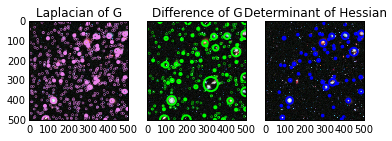

In [13]:
#
fig,axes = plt.subplots(1, 3, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})
axes = axes.ravel()
for blobs, color, title in sequence:
    ax = axes[0]
    axes = axes[1:]
    ax.set_title(title)
    ax.imshow(test_image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax.add_patch(c)

plt.show()